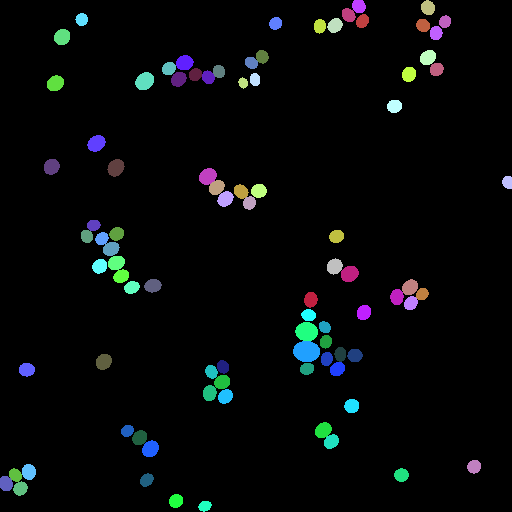

In [19]:
from PIL import Image

# img = Image.open("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/deepbacs/mixed/test/target/JE2NileRed_oilp22_PMP_101220_007_NR.tif")
# img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/images_train/[3354_44568].png')
# img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/ctc/train/BF-C2DL-HSC/01/t0000.tif')
# img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/ctc/train/Fluo-N2DH-SIM+/01/t001.tif')
# img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/ctc/train/DIC-C2DH-HeLa/01/t000.tif')
# img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/deepbacs/mixed/test/source/JE2NileRed_oilp22_PMP_101220_007_NR.tif')
img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/deepbacs/mixed/test/target/JE2NileRed_oilp22_PMP_101220_007_NR.tif')
# img = Image.open('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3_dapi_ki67/[3354_44568].png')
img.show()
img

['label', 'raw', 'segmentation']
Shape of image data (200, 550, 1000)


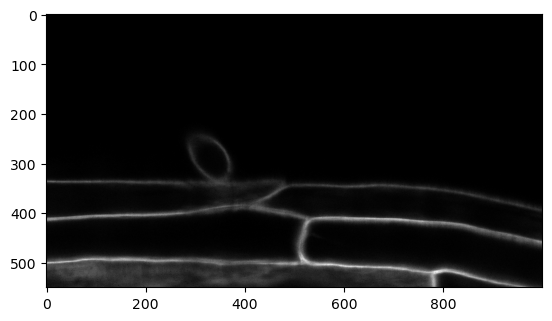

In [3]:
import cv2

# Path to your image
image_path = '/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/plantseg/root_train/Movie1_t00003_crop_gt.h5'

import h5py
import numpy as np
import matplotlib.pyplot as plt

with h5py.File(image_path, 'r') as f:
    # Print the list of datasets in the file
    print(list(f.keys()))
    raw = f['raw']
    image_data = raw[...]
    # Check if a specific dataset exists
    # if 'images' in f:
    #     dataset = f['images']
    #     image_data = dataset[...]
    # else:
    #     print("Error: Dataset 'images' not found!")

# Select the first image (if applicable) and handle grayscale (optional)
print(f'Shape of image data {image_data.shape}')
image_to_display = image_data[0, ...]  # Assuming first dimension is the stack dimension
# Display the second dimension (columns)
# for column in image_data[0]:  # Access the first row (you can change the index as needed)
#     print(column)

# # Display the third dimension (channels/depth)
# for channel in image_data[0, 0]:  # Access the first element in the first two dimensions
#     print(channel)

if len(image_to_display.shape) == 2:
    plt.imshow(image_to_display, cmap='gray')
else:
    plt.imshow(image_to_display)

plt.show()

In [11]:
%%time
import numpy as np
import glob
import cv2  # or any other library for image processing

# Define the pattern to match your image/mask files
pattern = "/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2dapi/**/*.png"  # Adjust the path and extension as needed

# List to store empty files
empty_files = []

# Use glob to find all matching files
for file in glob.glob(pattern, recursive=True):
  # Load the mask (or image)
    mask = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Load as grayscale for masks

    # Check if the mask is empty
    if mask is not None and np.all(mask == 0):
        empty_files.append(file)
        print(f"Empty mask found: {file}")

# Print out the results
if empty_files:
    print("Empty files:", empty_files)
else:
    print("No empty files found.")

No empty files found.
CPU times: user 27.2 s, sys: 1.68 s, total: 28.8 s
Wall time: 30.8 s


In [15]:
%%time
import os
import numpy as np
import cv2  # or any other library for image processing

# Define the root directory to start searching
# root_dir = "/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2dapi/"  # Adjust the path and extension as needed
root_dir = "/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/" 
# List to store empty files
empty_files = []

# Walk through the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.png'):  # Adjust the extension as needed
            file_path = os.path.join(dirpath, filename)
            # Load the mask (or image)
            mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale for masks

            # Check if the mask is empty
            if mask is not None and np.all(mask == 0):
                empty_files.append(file_path)
                print(f"Empty mask found: {file_path}")

# Print out the results
if empty_files:
    print("Empty files:", empty_files)
else:
    print("No empty files found.")

Empty mask found: /proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/masks_train/[5260_43480].png
Empty files: ['/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/masks_train/[5260_43480].png']
CPU times: user 24.2 s, sys: 2.55 s, total: 26.7 s
Wall time: 34.7 s


In [14]:
%%time
from pathlib import Path
import numpy as np
import cv2  # or any other library for image processing

# Define the root directory to start searching
# root_dir = Path("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2dapi/")  # Adjust the path and extension as needed
root_dir = Path("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/")  # Adjust the path and extension as needed
# root_dir = Path("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/")  # Adjust the path and extension as needed

# List to store empty files
empty_files = []

# Use Path to find all .png files recursively
for file_path in root_dir.rglob("*.png"):  # Adjust the extension as needed
    # Load the mask (or image)
    mask = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)  # Load as grayscale for masks

    # Check if the mask is empty
    if mask is not None and np.all(mask == 0):
        empty_files.append(file_path)
        print(f"Empty mask found: {file_path}")

# Print out the results
if empty_files:
    print("Empty files:", empty_files)
else:
    print("No empty files found.")

Empty mask found: /proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/masks_train/[5260_43480].png
Empty files: [PosixPath('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/masks_train/[5260_43480].png')]
CPU times: user 28.8 s, sys: 2.89 s, total: 31.7 s
Wall time: 40.7 s


(512, 512, 3)


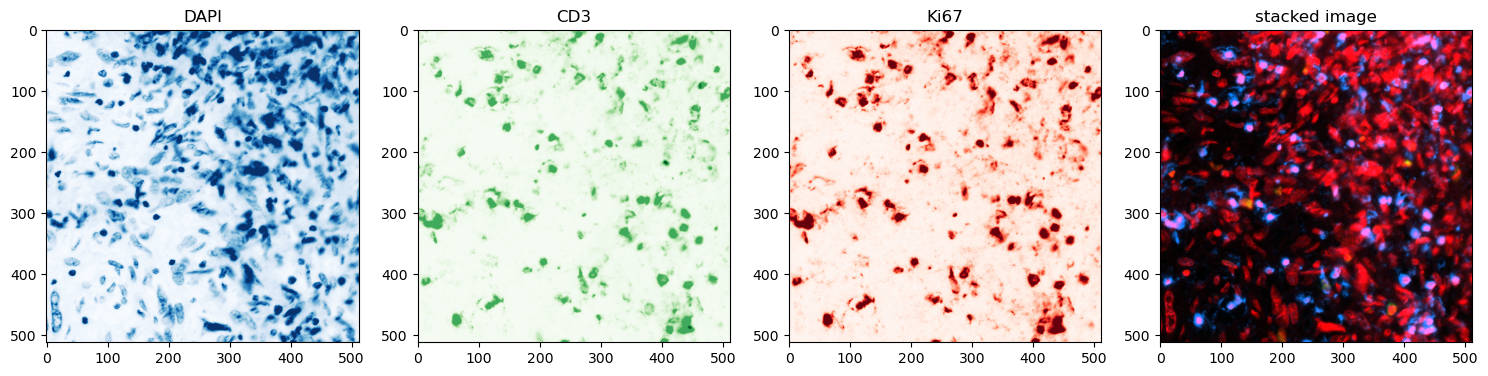

In [48]:
import cv2
import numpy as np

# Load the images
img1 = cv2.imread('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2dapi/masks_val/[4278_48723].png')
img2 = cv2.imread('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/masks_val/[4278_48723].png')
img3 = cv2.imread('/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/masks_val/[4278_48723].png')

# Stack the images
stacked_img = np.stack([img1, img2, img3], axis=0)

# Adjust the shape of the stacked image
# Adjust the shape of the stacked image
stacked_img = np.max(stacked_img, axis=0)

print(stacked_img.shape)
output_path = '/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/stacked_img.png'
cv2.imwrite(output_path, stacked_img) 
# Visualize the stacked image as a 3D image
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x, y, z = np.indices(stacked_img.shape)
# ax.scatter(x.ravel(), y.ravel(), z.ravel(), c=stacked_img.ravel())
# plt.show()
# Create a figure with a grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Display each image in a separate subplot
# axs[0].imshow(img1)
axs[0].imshow(stacked_img[:, :, 0], cmap='Blues')
axs[0].set_title("DAPI")

# axs[1].imshow(img2)
axs[1].imshow(stacked_img[:, :, 1], cmap="Greens")
axs[1].set_title("CD3")

# axs[2].imshow(img3)
axs[2].imshow(stacked_img[:, :, 2], cmap='Reds')
axs[2].set_title("Ki67")

axs[3].imshow(stacked_img)
axs[3].set_title("stacked image")

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()



In [52]:
import cv2
import numpy as np
import os

# Define the directories containing the mask files
directories = [
"/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2dapi/masks_val",
"/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/masks_val",
"/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/masks_val"
]

# Define the output directory where the stacked masks will be saved
output_directory = "/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3_dapi_ki67/masks_val"

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Define the fixed size for resizing
fixed_size = (512, 512)

# Iterate through each directory
for directory in directories:
# Check if the directory exists
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        continue

    # Get a list of all files in the directory
    files = os.listdir(directory)

    # Sort the files
    files.sort()

    # Iterate through all files in the directory
    for filename in files:
        if filename.endswith('.png'):  # Adjust the extension as needed
            file_path = os.path.join(directory, filename)
            # Load the mask (or image)
            mask = cv2.imread(file_path)
            
            # Check if the mask is loaded correctly
            if mask is not None:
                # Stack the mask with the corresponding masks from the other directories
                img1_path = os.path.join("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2dapi/masks_val", filename)
                img2_path = os.path.join("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2cd3/masks_val", filename)
                img3_path = os.path.join("/proj/aicell/users/x_liduo/seg/micro-sam/finetuning/generalists/training/light_microscopy/datasets/he2ki67/masks_val", filename)
                img1 = cv2.imread(img1_path)
                img2 = cv2.imread(img2_path)
                img3 = cv2.imread(img3_path)
                
                # Resize the images
                if img1 is not None and img2 is not None and img3 is not None:
                    img1 = cv2.resize(img1, fixed_size)
                    img2 = cv2.resize(img2, fixed_size)
                    img3 = cv2.resize(img3, fixed_size)
                    
                    # Stack the images
                    stacked_img = np.stack([img1, img2, img3], axis=0)
                    stacked_img = np.max(stacked_img, axis=0)
                    
                    # Save the stacked image
                    output_path = os.path.join(output_directory, filename)
                    cv2.imwrite(output_path, stacked_img)
            else:
                print(f"Failed to load mask: {file_path}")

IndentationError: expected an indented block after 'for' statement on line 22 (194159876.py, line 24)

In [25]:
import os

# Define the directories containing the files
directories = [
  "datasets/he2dapi/images_train",
  "datasets/he2dapi/masks_train",
  "datasets/he2dapi/images_val",
  "datasets/he2dapi/masks_val"
]

# Suffixes to remove
suffixes_to_remove = ["_HE", "_DAPI"]

# Iterate through each directory
for directory in directories:
    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        continue

    # Walk through the directory
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            # Check if the filename contains any of the suffixes
            for suffix in suffixes_to_remove:
                if filename.startswith("[") and suffix in filename:
                    new_filename = filename.replace(suffix, "")
                    break  # Exit loop after renaming

            # If the filename has changed, rename the file
            if 'new_filename' in locals():
                old_file_path = os.path.join(dirpath, filename)
                new_file_path = os.path.join(dirpath, new_filename)
                os.rename(old_file_path, new_file_path)
                print(f"Renamed: {old_file_path} to {new_file_path}")

print("All specified suffixes have been removed from filenames.")
# Iterate through each directory
# for directory in directories:
#     # Check if the directory exists
#     if not os.path.exists(directory):
#         print(f"Directory does not exist: {directory}")
#         continue

#     # Walk through the directory
#     for dirpath, dirnames, filenames in os.walk(directory):
#         for filename in filenames:
#             # Check if the filename contains ".."
#             if ".." in filename:
#                 new_filename = filename.replace("..", ".")
#                 old_file_path = os.path.join(dirpath, filename)
#                 new_file_path = os.path.join(dirpath, new_filename)
#                 os.rename(old_file_path, new_file_path)
#                 print(f"Renamed: {old_file_path} to {new_file_path}")

# print("All specified filenames have been modified.")

Renamed: datasets/he2dapi/images_train/[4336_53176]_HE.png to datasets/he2dapi/images_train/[4336_53176].png
Renamed: datasets/he2dapi/images_train/[8954_52483]_HE.png to datasets/he2dapi/images_train/[8954_52483].png
Renamed: datasets/he2dapi/images_train/[15390_40258]_HE.png to datasets/he2dapi/images_train/[15390_40258].png
Renamed: datasets/he2dapi/images_train/[12544_49853]_HE.png to datasets/he2dapi/images_train/[12544_49853].png
Renamed: datasets/he2dapi/images_train/[18161_44413]_HE.png to datasets/he2dapi/images_train/[18161_44413].png
Renamed: datasets/he2dapi/images_train/[20932_52724]_HE.png to datasets/he2dapi/images_train/[20932_52724].png
Renamed: datasets/he2dapi/images_train/[14053_44913]_HE.png to datasets/he2dapi/images_train/[14053_44913].png
Renamed: datasets/he2dapi/images_train/[16904_38454]_HE.png to datasets/he2dapi/images_train/[16904_38454].png
Renamed: datasets/he2dapi/images_train/[13515_48031]_HE.png to datasets/he2dapi/images_train/[13515_48031].png
Renam